### 15-5. Refactoring

/Users/jdpeeling/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


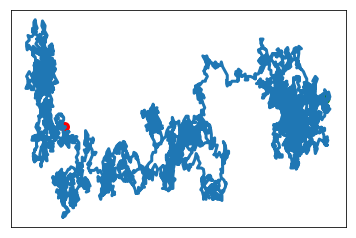

In [ ]:
from random import choice

class RandomWalk():
    """A class to generate random walks."""
    
    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        
        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]

    def get_step(self):
        """Determine the direction and distance for each step, and then calculate the step."""
        direction = choice([1, -1])
        distance = choice([0, 1, 2, 3, 4])
        step = direction * distance
        return step

    def fill_walk(self):
        """Calculate all the points in the walk."""
        
        # Keep taking steps until the walk reaches the desired length.
        while len(self.x_values) < self.num_points:
            
            # Decide which direction to go, and how far to go in that direction.
            x_step = self.get_step()
            y_step = self.get_step()
            
            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue
            
            # Calculate the next x and y values.
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)
            
import matplotlib.pyplot as plt

# Keep making new walks, as long as the program is active.
while True:
    # Make a random walk, and plot the points.
    rw = RandomWalk(5000)
    rw.fill_walk()
    
    # Plot the points, and show the plot.
    point_numbers = list(range(rw.num_points))
    plt.plot(rw.x_values, rw.y_values, linewidth=3)
    
    # Emphasizethe first and last points.
    plt.scatter(0, 0, c="green", edgecolors="none", s=100)
    plt.scatter(rw.x_values[-1], rw.y_values[-1], c="red", edgecolors="none",
                s=100)
    
    # Remove the axes.
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    
    plt.show()
    
    keep_running = input("Make another walk? (y/n): ")
    if keep_running == "n":
        break